<a href="https://colab.research.google.com/github/vahadruya/Capstone_Classification_Cardiovascular_Risk_Prediction/blob/main/Wordcloud/wordcloud_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text from [here](https://my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease)

In [ ]:
path = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 2 - CLASSIFICATION/Wordcloud/'
df = pd.read_csv(path + 'wc.csv', encoding = 'ISO-8859-1')

In [ ]:
data = df.copy()
data

,Train Recall
0,Coronary artery disease (CAD) is a narrowing o...
1,Picture two traffic lanes that merge into one ...
2,You might have CAD for many years and not have...
3,Other names for CAD include coronary heart dis...
4,Forms of coronary artery disease
...,...
167,When should I go to the emergency room?
168,Call 911 or your local emergency number if you...
169,A note from Cleveland Clinic
170,Learning you have coronary artery disease can ...


In [ ]:
!pip install contractions
import contractions

def expand_contractions(text):
  '''Expands contractions in textual data'''
  expanded_words = []
  for word in text.split():
    expanded_words.append(contractions.fix(word))
  return ' '.join(expanded_words)

def make_lower(text):
  return text.lower()

def remove_punc(text):
  return re.sub(r'\W',' ',text)

def remove_digits(text):
  return re.sub(r'\d',' ',text)

def remove_whitespace(text):
  return re.sub(r'\s+',' ',text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data['Train Recall'] = data['Train Recall'].apply(expand_contractions)
data['Train Recall'] = data['Train Recall'].apply(make_lower)
data['Train Recall'] = data['Train Recall'].apply(remove_punc)
data['Train Recall'] = data['Train Recall'].apply(remove_digits)
data['Train Recall'] = data['Train Recall'].apply(remove_whitespace)

In [ ]:
data

,Train Recall
0,coronary artery disease cad is a narrowing or ...
1,picture two traffic lanes that merge into one ...
2,you might have cad for many years and not have...
3,other names for cad include coronary heart dis...
4,forms of coronary artery disease
...,...
167,when should i go to the emergency room
168,call or your local emergency number if you hav...
169,a note from cleveland clinic
170,learning you have coronary artery disease can ...


In [ ]:
def remove_stopwords(text, stop_words):
  '''Removes stopwords (given as input)  from text'''
  text = [word for word in text.split() if word.lower() not in stop_words]
  return ' '.join(text)

nltk.download('stopwords')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['Train Recall'] = data['Train Recall'].apply(remove_stopwords, stop_words = stop_words)

In [ ]:
data

,Train Recall
0,coronary artery disease cad narrowing blockage...
1,picture two traffic lanes merge one due constr...
2,might cad many years symptoms experience heart...
3,names cad include coronary heart disease chd i...
4,forms coronary artery disease
...,...
167,go emergency room
168,call local emergency number symptoms heart att...
169,note cleveland clinic
170,learning coronary artery disease mix emotions ...


In [ ]:
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(data['Train Recall'])
tokens_df = pd.DataFrame(vectorized.todense(), columns = vectorizer.get_feature_names_out())
top_df = pd.DataFrame(tokens_df.sum().sort_values(ascending=False)).rename(columns = {0:'Occurences'})

In [ ]:
top_df.loc['bloodpressure'] = top_df.loc['blood'] + top_df.loc['pressure']
top_df = top_df.drop(['blood', 'pressure'])

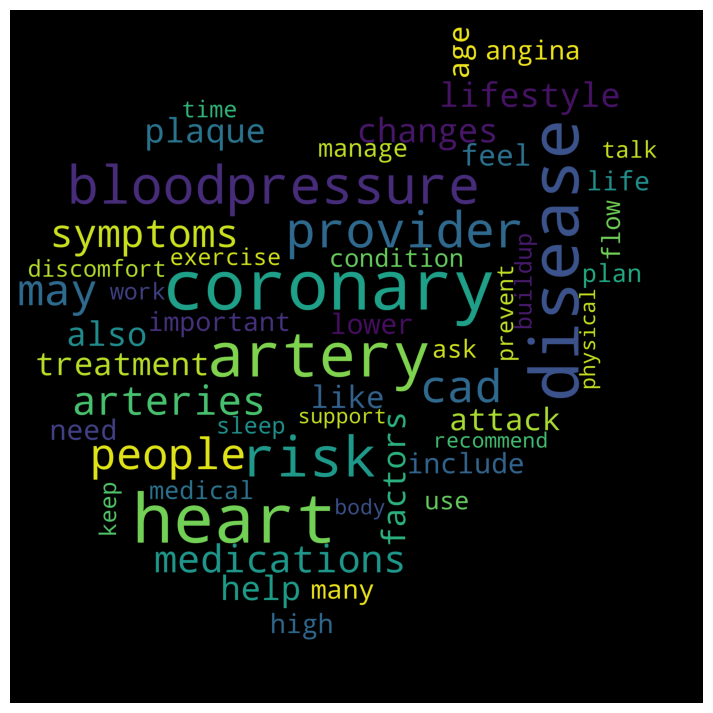

In [ ]:
mask_im = np.array(Image.open(path + "heart.png"))
# colours = ['black', 'darkslateblue', 'darkolivegreen', 'khaki']
colours = ['black']
wordcloud = WordCloud(width = 1300, height = 800, background_color = random.choice(colours), mask = mask_im, min_font_size = 100, max_font_size = 350, max_words = 300).generate(' '.join(list(top_df.index)))
wordcloud = wordcloud.generate_from_frequencies(frequencies = top_df['Occurences'])
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(path + 'wc.png')